### Data preprocessing 


#### 1. Exploratory analysis & Outlier detection

#### To do:

- [X] merge aquastat with water stress
- [ ] Decide vars to keep


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Load data

1. AquaStat 

In [2]:
df = pd.read_csv('Project/MDA-Tuvalu/clean data/aqua_socec_clean.csv', index_col=0)
df.sample(5)

,country,variable,1998-2002,2003-2007,2008-2012,2013-2017
1459,OMN,Total population with access to safe drinking-...,85.500000,89.400000,93.300000,93.400000
650,ETH,Urban population (1000 inhab),10657.558000,13054.220000,16787.864000,21316.856000
707,GAB,GDP per capita (current US$/inhab),4174.348162,8352.817404,9774.192338,7372.081131
1926,TJK,Urban population (1000 inhab),1708.937000,1896.382000,2122.257000,2407.140000
656,ETH,Total population with access to safe drinking-...,32.700000,42.000000,51.600000,57.300000


In [3]:
# rename year period to merge with water stress indicators
df.rename(columns = {'country':'Country' ,
                     '1998-2002':'2002', 
                     '2003-2007': '2007', 
                     '2008-2012': '2012',
                     '2013-2017':'2017'}, inplace = True)

2. Water stress data

In [4]:
df_ws = pd.read_csv('Project/MDA-Tuvalu/clean data/water_stress.csv')
df_ws.sample(5)

,Country,Year,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
205,EST,2017,13.930970,11.821825,19.307359
134,COG,2012,0.005529,120.971289,0.027446
673,VEN,2017,1.707253,9.557190,7.540367
582,SUR,2007,0.622121,5.849876,3.950609
611,TCD,2017,1.924726,8.359339,4.294922


In [5]:
df_ws["Year"].unique()
df_ws["Year"] = df_ws["Year"].astype("string")
df_ws["Year"] = df_ws["Year"].astype("object")
df_ws["Year"].unique()

array(['2002', '2007', '2012', '2017'], dtype=object)

3. UNICEF dataset

In [45]:
df_unif = pd.read_csv('Project/MDA-Tuvalu/clean data/unicef_socec_clean.csv', index_col=0)
df_unif.sample(5)

,Indicator,Country,Time,Value
37803,"GDP, PPP (current international $)",NLD,2015,8.521132e+11
45365,"GNI per capita, Atlas method (current US$)",JOR,2009,3.380000e+03
92986,DEC alternative conversion factor (LCU per US$),IND,2006,4.520000e+01
34660,"GDP per capita, PPP (current international $)",ISL,2010,3.960700e+04
43022,General government total expenditure (current ...,PAK,2013,4.884793e+12


In [7]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     694 non-null    object 
 1   Year                        694 non-null    object 
 2   Water stress (MDG)          689 non-null    float64
 3   Water use efficiency (SDG)  594 non-null    float64
 4   Water stress (SDG)          687 non-null    float64
dtypes: float64(3), object(2)
memory usage: 27.2+ KB


In [8]:
# transform type indicators and slice length name
df["variable"] = df["variable"].astype("string")
df['variable'].unique()
df["variable"] = df['variable'].str.slice(0,35)
df['variable'].unique()

<StringArray>
[      'Rural population (1000 inhab)',       'Urban population (1000 inhab)',
      'Population density (inhab/km2)',  'GDP per capita (current US$/inhab)',
 'Human Development Index (HDI) [high', 'Total population with access to saf',
 'Rural population with access to saf', 'Urban population with access to saf']
Length: 8, dtype: string

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 2187
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   1120 non-null   object 
 1   variable  1120 non-null   string 
 2   2002      1120 non-null   float64
 3   2007      1120 non-null   float64
 4   2012      1120 non-null   float64
 5   2017      1120 non-null   float64
dtypes: float64(4), object(1), string(1)
memory usage: 61.2+ KB


In [10]:
# transform data aquastat long format (year as attribute)
df_melt = pd.melt(df, id_vars=["Country","variable"], 
        var_name="Year", 
        value_name="value")
df_melt.head(5)

,Country,variable,Year,value
0,AFG,Rural population (1000 inhab),2002,17086.910000
1,AFG,Urban population (1000 inhab),2002,4893.013000
2,AFG,Population density (inhab/km2),2002,34.618096
3,AFG,GDP per capita (current US$/inhab),2002,194.958382
4,AFG,Human Development Index (HDI) [high,2002,0.378000


In [11]:
# transform data aquastat wide format (indicators as attributes)
df_piv = df_melt.pivot_table(values='value', 
                             index=['Year','Country'], 
                             columns='variable',
                             fill_value=0)
df_piv = df_piv.reset_index()

In [12]:
df_piv.head(5)

variable,Year,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [high,Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to saf,Total population with access to saf,Urban population (1000 inhab),Urban population with access to saf
0,2002,AFG,194.958382,0.378,34.618096,17086.910,27.6,33.8,4893.013,55.9
1,2002,AGO,869.851352,0.419,14.052633,8353.851,37.0,45.7,9218.798,62.6
2,2002,ALB,1396.545492,0.680,108.736939,1762.229,93.5,96.1,1356.800,99.5
3,2002,ARE,31720.544451,0.793,41.612165,664.034,100.0,99.7,2843.198,99.6
4,2002,ARG,2918.591423,0.770,13.552636,3974.741,83.7,96.7,33914.629,98.2


In [13]:
# merge aquastat with water stress. 
# left merge to only keep aquastat countries
df_piv_ws = pd.merge(df_piv, df_ws, on=["Country", "Year"], how='left')
df_piv_ws.sample(5)

,Year,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [high,Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to saf,Total population with access to saf,Urban population (1000 inhab),Urban population with access to saf,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
417,2012,YEM,1287.627793,0.501,46.353350,16700.108,46.5,54.9,8209.861,72.0,169.761905,10.705402,169.761905
116,2002,SVN,11813.822898,0.843,98.039813,977.096,99.4,99.6,1011.168,99.8,2.821462,NaN,6.079784
434,2017,BHR,23739.143918,0.839,1915.482051,161.409,100.0,100.0,1331.175,100.0,133.706897,76.213520,133.706897
64,2002,ISR,19412.992072,0.865,279.533892,540.933,100.0,100.0,5698.352,100.0,86.713483,89.188200,133.163661
65,2002,JAM,3605.711991,0.683,245.026843,1287.060,89.0,93.5,1408.386,97.7,11.034701,13.476172,11.034701


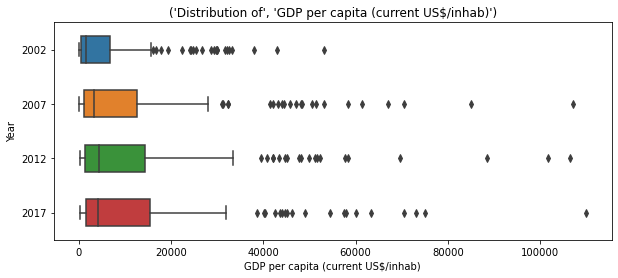

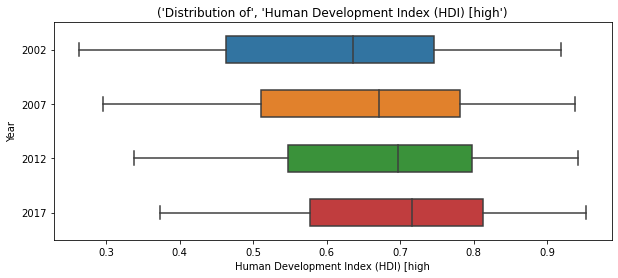

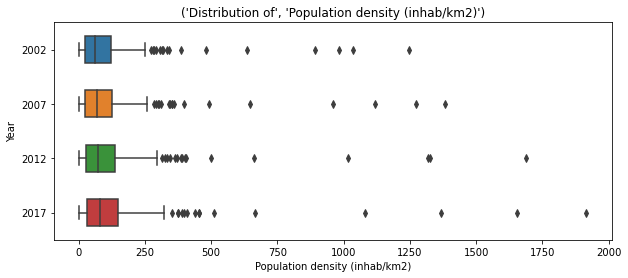

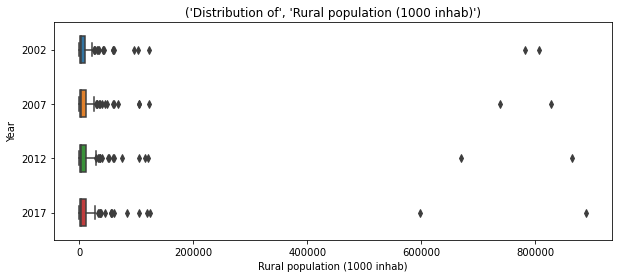

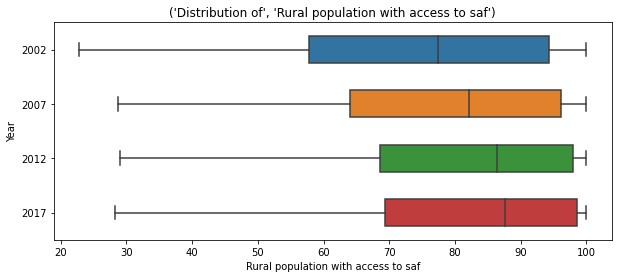

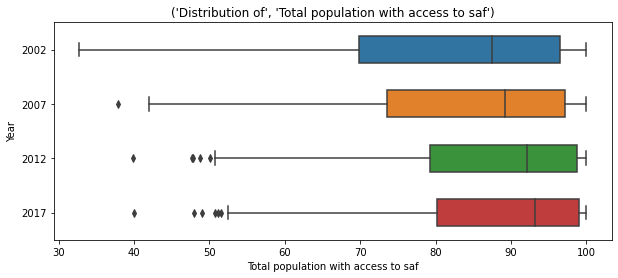

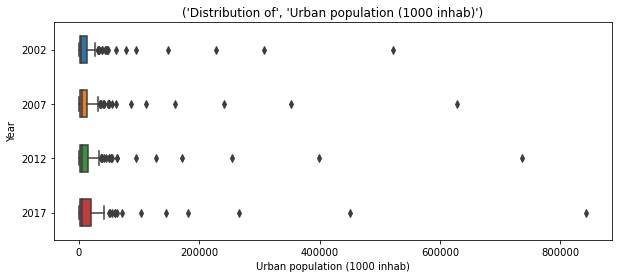

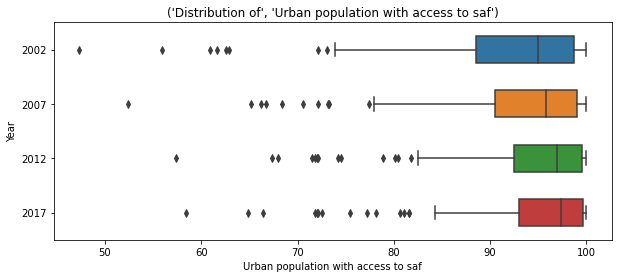

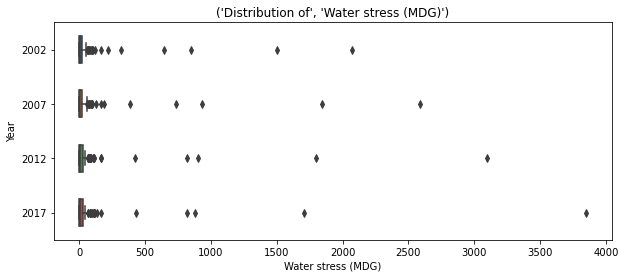

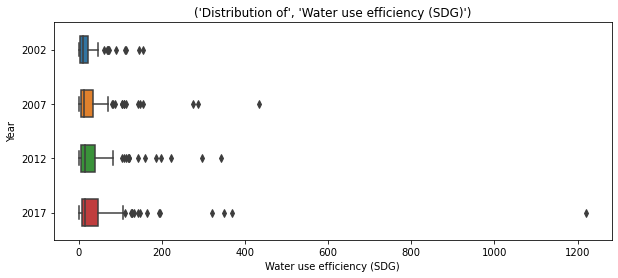

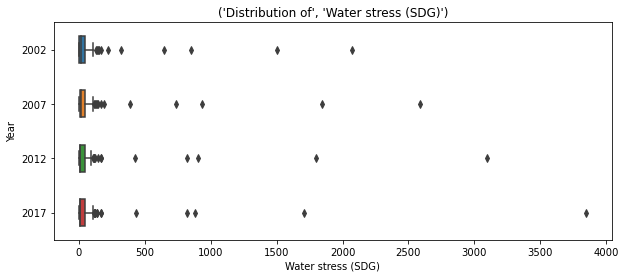

In [14]:
# Distribution per indicator en time period
#variable = df['variable'].unique()

variable = df_piv_ws.columns[2:]

for i in variable:
    plt.figure(figsize=(10,4))
    sns.boxplot(data = df_piv_ws, x = i ,y ='Year', width=0.5)
    plt.title(("Distribution of", i)) 

In [17]:
# quick check for one time period
df_p = df[['Country','variable','2017']]
# df_p.head(10)

In [ ]:
# df_p.describe()

In [18]:
df_p = df_p.pivot('Country','variable','2017')
#corr_data = df_p.corr()

In [19]:
# transform variables (std) before heatmap
scaler = StandardScaler()
# get numeric data

num_d = df_p.select_dtypes(include=['float64'])

# update the cols with their normalized values
df_p[num_d.columns] = scaler.fit_transform(num_d)

<AxesSubplot:xlabel='variable', ylabel='Country'>

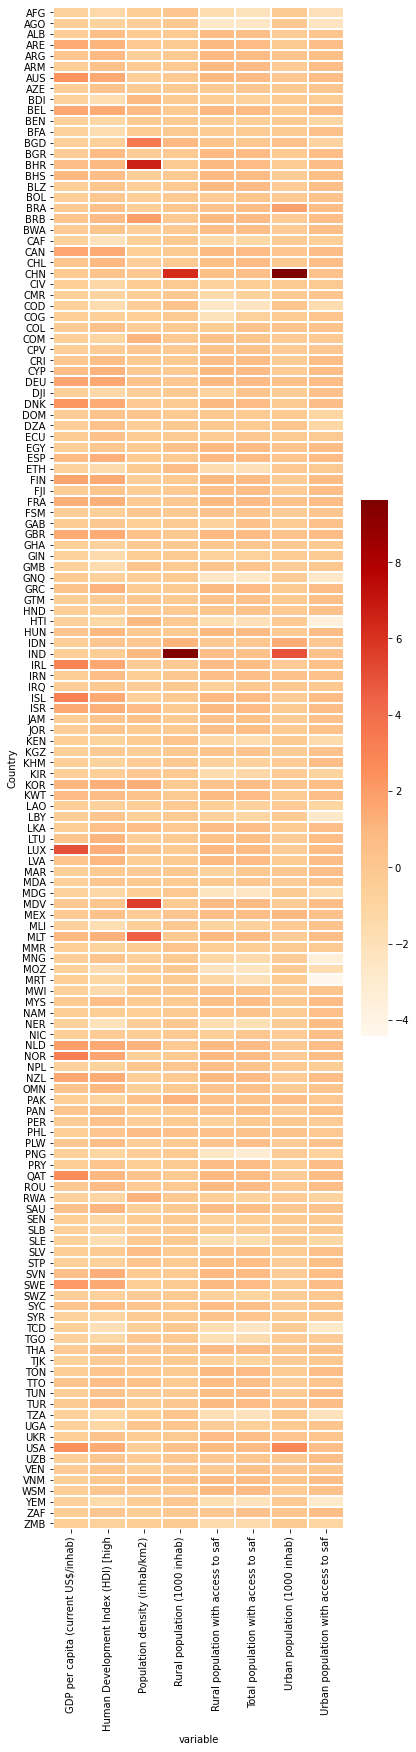

In [20]:
plt.subplots(figsize=(6,.2*(len(df_p.index))))
sns.heatmap(df_p,      
            cbar_kws={'fraction' : 0.08}, # shrink colour bar
            cmap='OrRd', # use orange/red colour map
            linewidth=1)

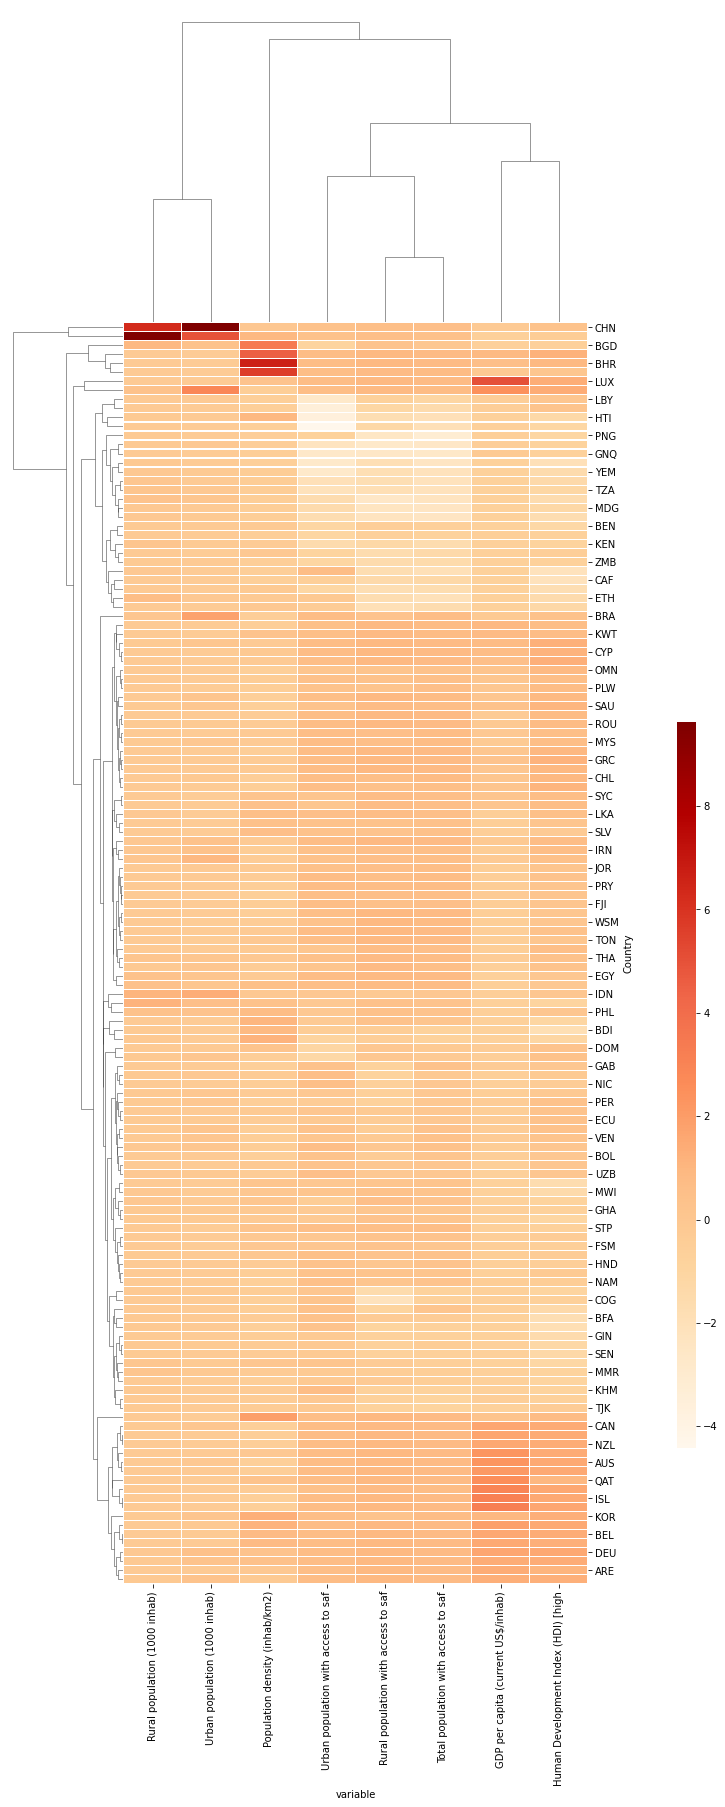

In [21]:
sns.clustermap(df_p, 
               linewidth=0.05,
               cmap='OrRd',
               figsize=(9,(.18*(len(df_p.index)))),
               cbar_pos=(1.05, .2, .03, .4))

# Rural & total pop with access to water 
# Rutal & total pop per 1000 habs same: decide which to drop


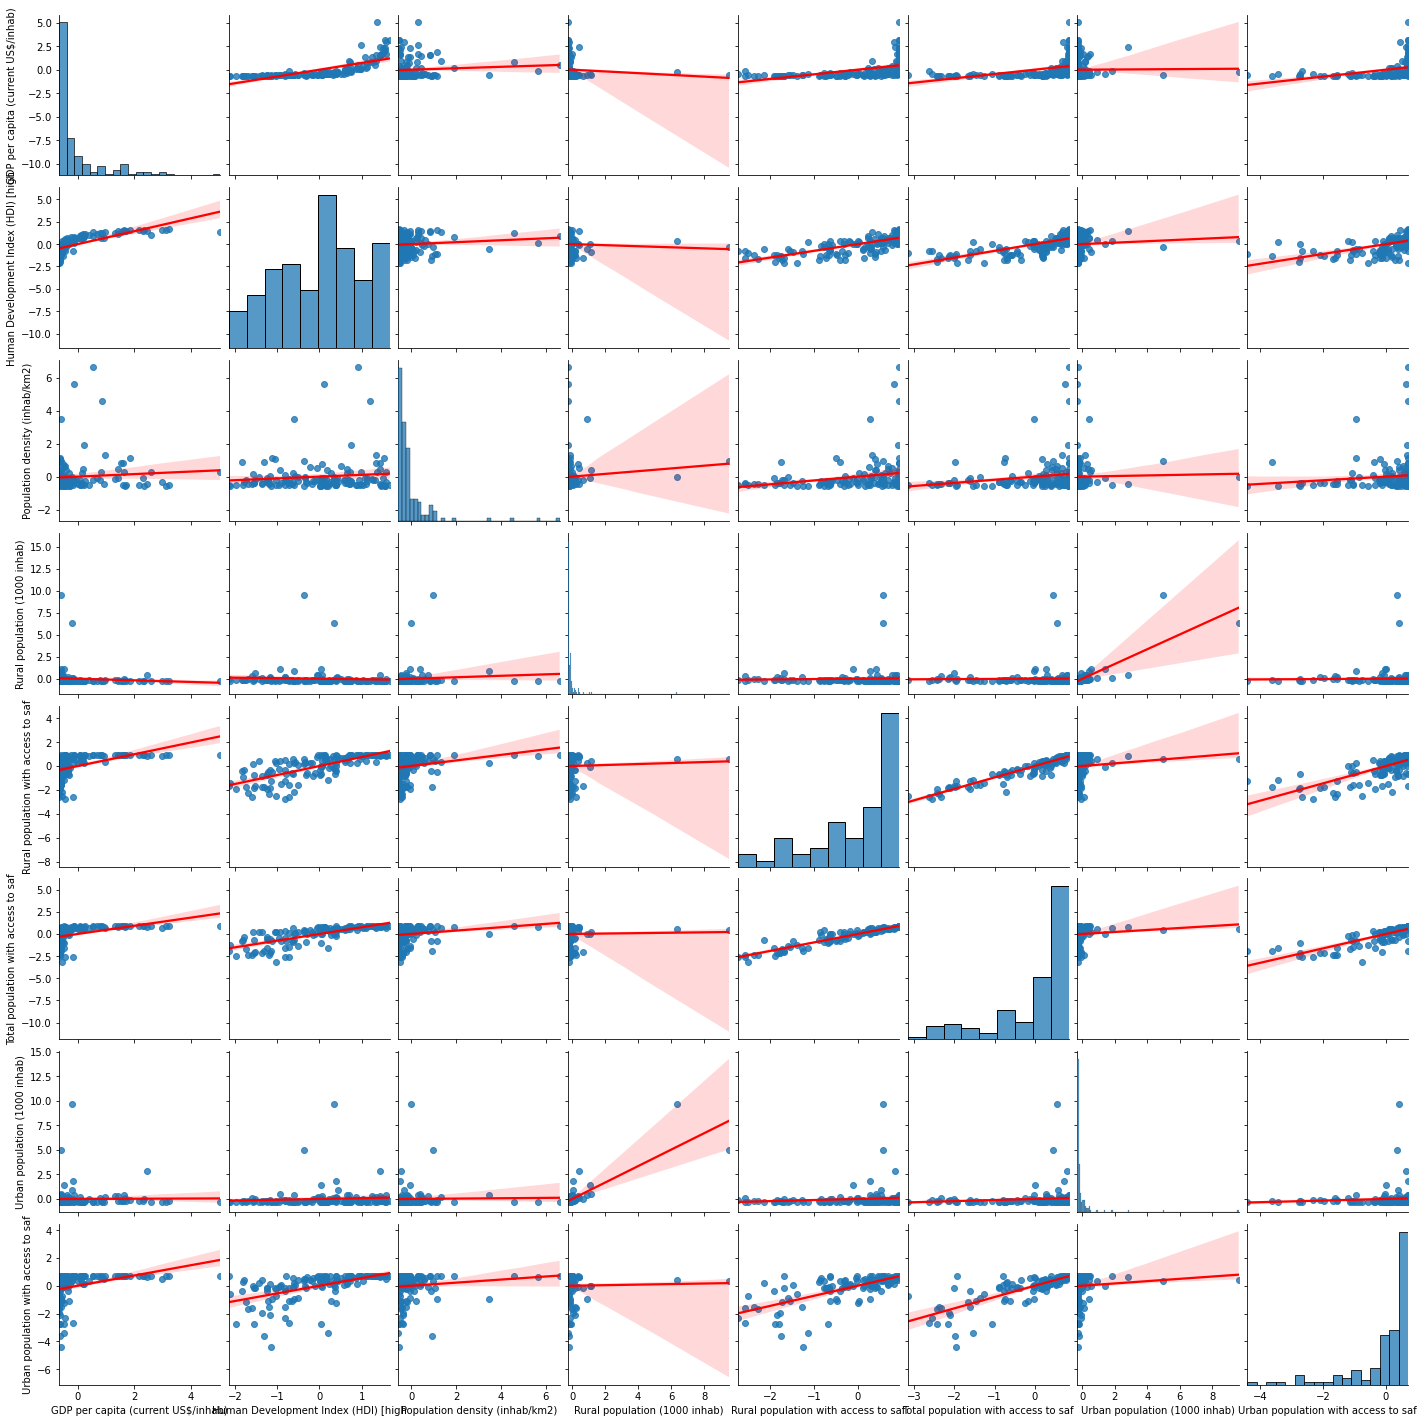

In [22]:
sns.pairplot(df_p,kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [25]:
#sns.pairplot(df_p,kind="reg")
#plot_kws={'line_kws':{'color':'red'}})

### Exploratory analysis AquaStat and Water Stress




In [26]:
# Exploratory analysis aquastat and ws (one time period)
df_piv_ws_17 = df_piv_ws.loc[df_piv_ws.Year == '2017']
df_piv_ws_17.sample(5)

,Year,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [high,Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to saf,Total population with access to saf,Urban population (1000 inhab),Urban population with access to saf,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
542,2017,TGO,593.975597,0.510,135.560380,4588.034,44.2,63.1,3209.660,91.4,1.517007,13.405166,3.391635
477,2017,HUN,14556.367247,0.841,104.588015,2813.212,100.0,100.0,6908.347,100.0,4.325962,23.880203,7.770294
436,2017,BLZ,4901.752333,0.719,16.359121,203.824,100.0,99.5,170.857,98.9,0.464710,13.283185,1.260294
528,2017,ROU,10757.282696,0.813,82.441145,9065.003,100.0,100.0,10614.303,100.0,3.194661,25.478913,6.341167
489,2017,KHM,1385.609732,0.578,88.430231,12327.338,69.1,75.5,3678.035,100.0,0.458727,6.999747,1.036545


In [27]:
df_piv_ws_17.describe()

,GDP per capita (current US$/inhab),Human Development Index (HDI) [high,Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to saf,Total population with access to saf,Urban population (1000 inhab),Urban population with access to saf,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,132.000000,129.000000,132.000000
mean,13134.444841,0.699629,154.628324,22224.068357,81.530000,87.288571,25767.408229,94.205000,76.716541,49.664064,85.088501
std,19323.264081,0.152774,267.189948,91319.925924,19.532414,15.024881,85209.040162,8.136155,378.614091,121.678596,377.929927
min,296.110481,0.373000,1.990764,0.000000,28.200000,40.000000,17.245000,58.400000,0.005529,0.685503,0.027446
25%,1581.047202,0.576750,30.771496,880.254500,69.350000,80.200000,1837.374500,93.050000,1.322266,6.656907,3.394164
50%,4206.750787,0.716500,79.287521,3947.505000,87.650000,93.200000,5364.441500,97.400000,5.258066,13.616564,10.324766
75%,15419.502516,0.813000,149.684302,12863.151000,98.550000,99.025000,19035.030750,99.700000,26.845612,46.509821,45.697098
max,110003.247419,0.953000,1915.482051,889216.746000,100.000000,100.000000,843314.783000,100.000000,3850.500000,1221.061026,3850.500000


In [28]:
df_piv_ws_17.nlargest(5,'Water use efficiency (SDG)')
# looking above boxplot per year Water eff for luxemburg might be an outlier 

,Year,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [high,Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to saf,Total population with access to saf,Urban population (1000 inhab),Urban population with access to saf,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
497,2017,LUX,110003.247419,0.908,228.536680,54.103,100.0,100.0,529.352,100.0,1.302857,1221.061026,3.781095
456,2017,DNK,57454.289221,0.929,140.050672,701.971,100.0,100.0,5031.580,100.0,12.351667,368.612902,20.040562
480,2017,IRL,70492.921726,0.939,67.633452,1764.335,97.8,97.9,2997.322,97.9,1.455769,349.767068,3.642926
468,2017,GBR,40286.571861,0.919,273.911009,11156.164,100.0,100.0,55025.421,100.0,5.727211,319.736428,14.354646
537,2017,SWE,54541.574444,0.935,22.137309,1273.943,100.0,100.0,8636.758,100.0,1.364943,194.076472,3.427128


In [29]:
df_piv_ws_17.nlargest(5,'GDP per capita (current US$/inhab)')
# Luxemburg has low population density and largest water use efficiency + highest GDP 

,Year,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [high,Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to saf,Total population with access to saf,Urban population (1000 inhab),Urban population with access to saf,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
497,2017,LUX,110003.247419,0.908,228.536680,54.103,100.0,100.0,529.352,100.0,1.302857,1221.061026,3.781095
516,2017,NOR,75092.402428,0.953,13.749263,961.814,100.0,100.0,4343.569,100.0,0.684758,128.770322,2.046464
483,2017,ISL,73108.083207,0.935,3.246534,20.862,100.0,100.0,314.163,100.0,0.170588,58.338989,0.394075
480,2017,IRL,70492.921726,0.939,67.633452,1764.335,97.8,97.9,2997.322,97.9,1.455769,349.767068,3.642926
527,2017,QAT,63249.467320,0.848,237.139077,24.338,100.0,100.0,2614.873,100.0,432.413793,191.638949,432.413793


In [30]:
df_piv_ws_17.nlargest(5,'Water stress (MDG)')

,Year,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [high,Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to saf,Total population with access to saf,Urban population (1000 inhab),Urban population with access to saf,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
492,2017,KWT,28897.241961,0.809,227.614983,0.000,99.0,99.0,4136.528,99.0,3850.500000,102.435536,3850.500000
423,2017,ARE,40180.344045,0.864,133.584948,1292.709,100.0,99.6,8107.436,99.6,1708.000000,92.773763,1708.000000
530,2017,SAU,20905.391689,0.856,15.398117,5394.590,97.0,97.0,27543.623,97.0,883.333333,28.270985,883.333333
494,2017,LBY,3940.670630,0.704,3.740025,1286.565,68.3,71.2,5088.051,72.1,817.142857,3.793108,817.142857
527,2017,QAT,63249.467320,0.848,237.139077,24.338,100.0,100.0,2614.873,100.0,432.413793,191.638949,432.413793


In [31]:
corr_data = df_piv_ws_17.corr()

<AxesSubplot:>

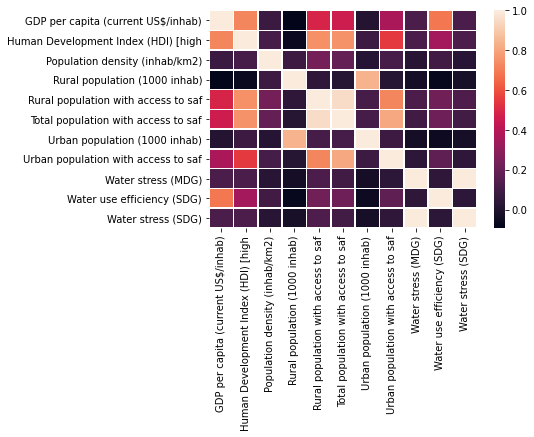

In [32]:
sns.heatmap(corr_data,
           linewidths=.5)

# drop: - Rural or urban pop with access to saf
#       - WS (MDG) or (SDG)
#       - Rural & Urban pop(1000 inhab) 

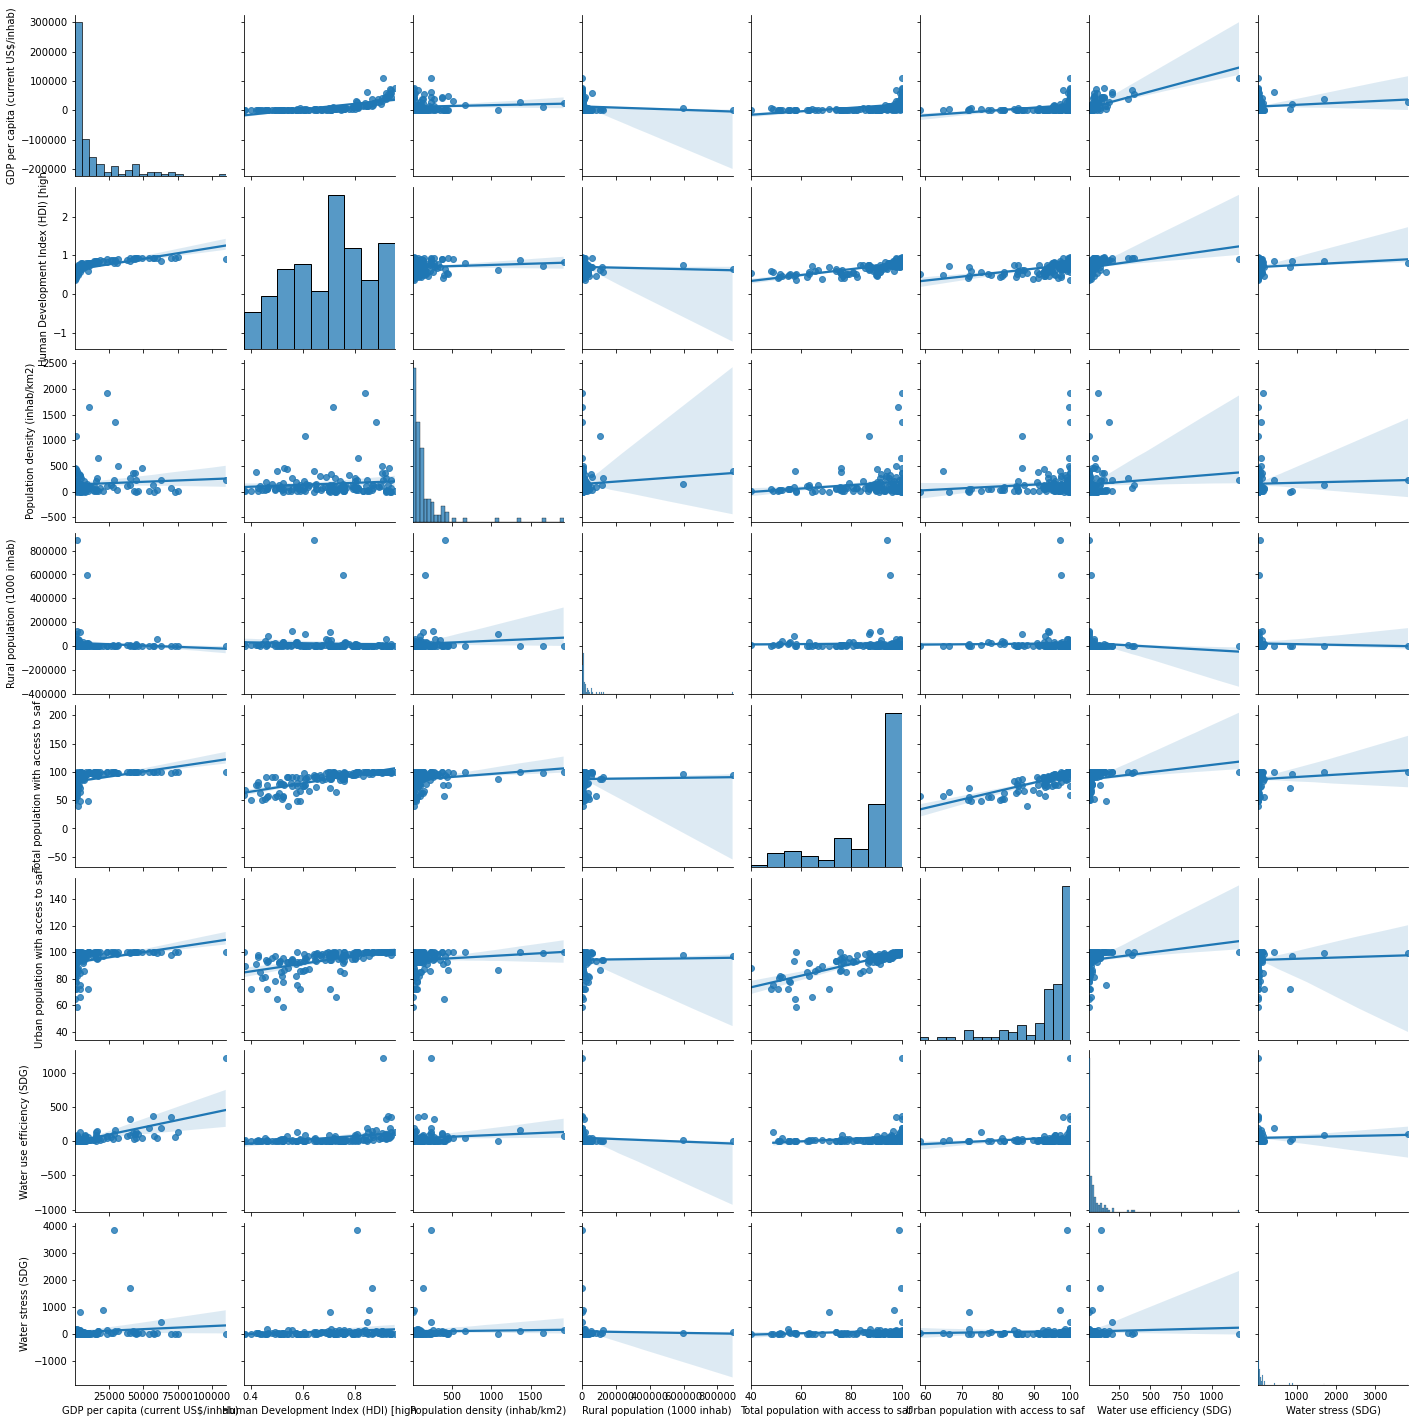

In [33]:
df_keep = df_piv_ws_17.loc[:, ~df_piv_ws_17.columns.isin(['Rural population with access to saf',
                                       'Water stress (MDG)',
                                       'Urban population (1000 inhab)'])]
sns.pairplot(df_keep,kind="reg")
#plot_kws={'line_kws':{'color':'red'}})

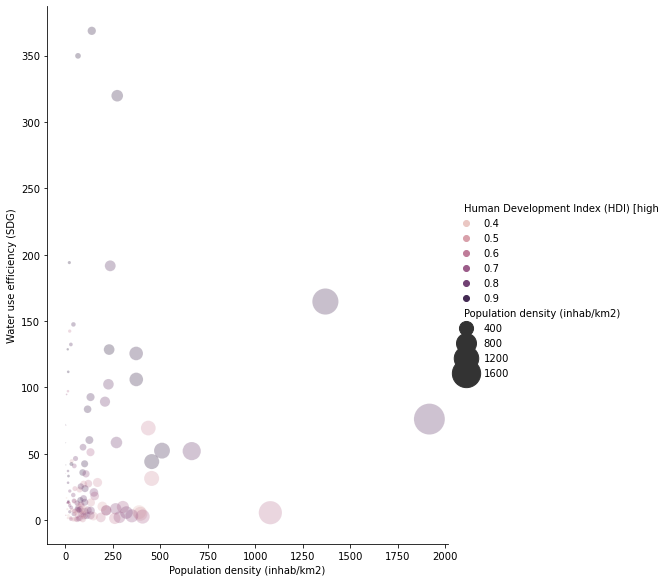

In [42]:
# After removing LUX

#g.set(xscale="log", yscale = "log")

df_replot = df_piv_ws_17.loc[~((df_piv_ws_17['Country'] == 'LUX')),:]
g = sns.relplot(x="Population density (inhab/km2)", y='Water use efficiency (SDG)',
               size="Population density (inhab/km2)",
                hue = 'Human Development Index (HDI) [high',
                alpha =0.3,
      #          style="event",
      #          col="country",
                height=8, aspect=.8, 
                #kind="line", 
              sizes=(0,0.5*max(df_replot["Population density (inhab/km2)"])),
                data=df_replot)



In [39]:
g = sns.relplot(x="GDP per capita (current US$/inhab)", y='Water use efficiency (SDG)',
                size="Population density (inhab/km2)",
                hue = 'Human Development Index (HDI) [high',
                alpha =0.3,
      #         style="event",
      #         col="country",
                height=5, aspect=.8, 
                #kind="line", 
                sizes=(0,0.5*max(df_piv_ws_17["Population density (inhab/km2)"])),
                data=df_piv_ws_17)

IndentationError: unexpected indent (<ipython-input-39-59ba24317b18>, line 2)

3. Exploratory UNICEF dataset

In [43]:
df_unif.describe()

,Time,Value
count,80784.000000,8.078400e+04
mean,2009.510373,1.611890e+13
std,5.764977,6.139415e+14
min,2000.000000,-6.210000e+01
25%,2005.000000,9.000000e+00
50%,2010.000000,3.304000e+03
75%,2014.000000,3.407799e+09
max,2020.000000,1.528323e+17
